### Task: Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


#### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge

In [205]:
df = pd.read_csv('ToyotaCorolla_MLR.csv')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [207]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [208]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [209]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [210]:
df.duplicated().sum()

np.int64(1)

In [211]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [212]:
df.duplicated().sum()

np.int64(0)

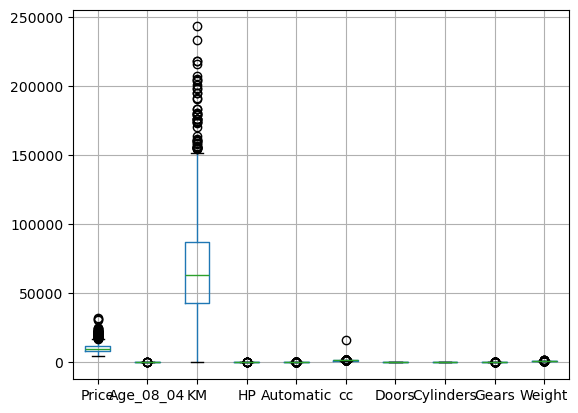

In [213]:
df.boxplot()
plt.show()

In [214]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_extreme =Q1 - 1.5 * IQR
    upper_extreme =Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)


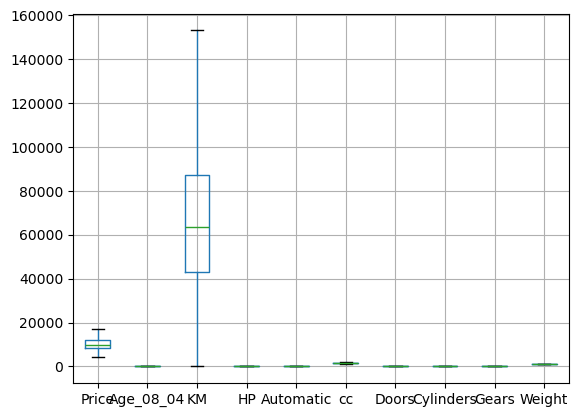

In [215]:
df.boxplot()
plt.show()

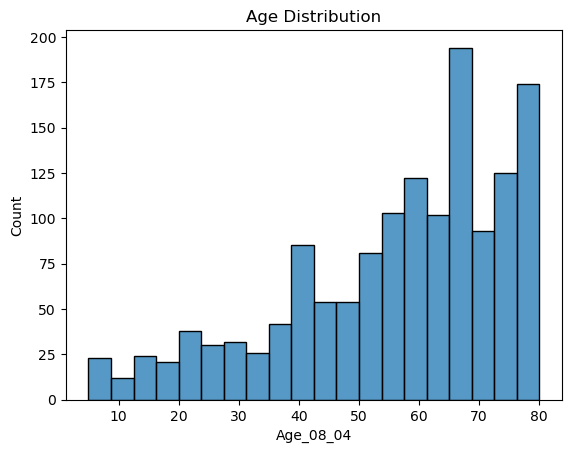

In [216]:
sns.histplot(df['Age_08_04'],bins=20)
plt.title('Age Distribution')
plt.show()

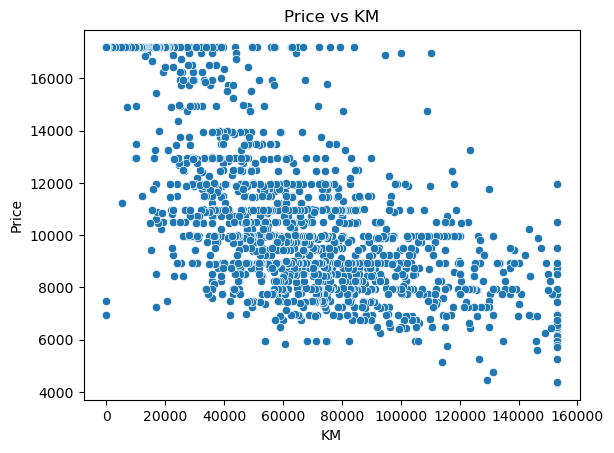

In [217]:
sns.scatterplot(x='KM',y='Price',data=df)
plt.title('Price vs KM')
plt.show()

In [218]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df['Automatic'] = df['Automatic'].apply(lambda x: 1 if x == 'yes' else 0)

#### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [227]:
target = df[['Price']]
features = df.drop(columns=['Price'],axis=1)

In [251]:
x_train,x_test,y_train,y_test = train_test_split (features,target, train_size=0.2,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(287, 11)
(1148, 11)
(287, 1)
(1148, 1)


#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [252]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [253]:
b1 = lin_model.coef_
b1

array([[-1.06345746e+02, -1.25755966e-02,  2.86911422e+01,
         1.70530257e-13, -3.34583885e+00, -3.14209938e+02,
        -2.55795385e-13,  0.00000000e+00,  2.91079008e+01,
         1.48155942e+03,  1.56278838e+03]])

#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [254]:
y_pred = lin_model.predict(x_test)
print("R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2: 0.8569934068856231
MAE: 847.3528980370832
MSE: 1254161.0421166634


#### 5.Apply Lasso and Ridge methods on the model.

In [266]:
lasso = Lasso(alpha = 1.0)
lasso.fit(x_train,y_train)

Lasso()

In [267]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

Ridge()

In [268]:
print("Lasso R^2:", r2_score(y_test, lasso.predict(x_test)))
print("Ridge R^2:", r2_score(y_test, ridge.predict(x_test)))

Lasso R^2: 0.8571370860077795
Ridge R^2: 0.8571055760257102
